In [40]:
# Importando bibliotecas que vão ser utilizadadas para o tratamento, redução e visualização de alguns dados para tomada de decisão na escolha estratégica das variáveis de interesse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', None)
import dask.dataframe as dd
import os

In [41]:
# # Importando dicionário de dados fornecido - informações sobre as variáveis e visualizando seu tamanho
# dic = pd.read_excel('DATABASE/dicionario_PNS_microdados_2019_FELCRUZ.xls', skiprows=1)
# # Visualizando o cabeçalho e alguns dados do dicionário
# dic.head(5)

In [42]:
# Lendo o arquivo que contem a base de dados e estruturando de acordo com a coluna tamanho
df = pd.read_csv('DATABASE/PNS_2019.csv', sep=';', low_memory=False)
df.head()


,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,V0025B,A001,A002010,A003010,A004010,A01001,A011,A005010,A005012,A00601,A009010,A01401,A01402,A01403,A01501,A016010,A018011,A018012,A018013,A018014,A018015,A018016,A018017,A018018,A018019,A018020,A018021,A018022,A018023,A018024,A018025,A018026,A018027,A018028,A01901,A02101,A02102,A02201,A02305,A02306,A02307,A02308,A02401,A02402,B001,B002,B003,B004,C001,C00301,C004,C006,C00701,C00702,C00703,C008,C009,C01001,C010010,C013,C014,C015,C016,C017,C018,C01801,C011,C012,D001,D00201,D00202,D00301,D00501,D006,D00601,D007,D008,D00901,D010,D01101,D01201,D01301,D01302,D01303,D014,D015,E001,E002,E003,E004,E005,E006011,E008,E010010,E010011,E010012,E010013,E011,E01201,E01401,E014011,E01402,E01403,E01501,E01601,E01602,E01603,E01604,E01605,E017,E01801,E01802,E01803,E01804,E01805,E019,E022,E023011,E024011,E02402,E024021,E025,E02501,E02502,E02503,E026,E02601,E02801,E02802,E02803,E02804,E02805,E02806,E030,E03101,E03102,E03103,E03104,E03105,E03106,E03107,E03108,E032,E033,E027,F001011,F001021,F007011,F007021,F008011,F008021,VDF001,VDF00102,F016,G033,G034,G035,G036,G038,G039,G040,G041,G042,G044,G046,G047,G048,G049,G050,G051,G052,G053,G054,G055,G057,G058,G05801,G059,G060,G061,G062,G063,G064,G065,G066,G067,G068,G070,G071,G072,G073,G074,G075,G076,G077,G079,G080,G081,G082,G083,G084,G085,G086,G032,I00101,I00102,I001021,I00103,I001031,I005,I006,I004,I00401,I00402,I00403,I00404,I010010,I012,J001,J00101,J002,J003,J00402,J00404,J005,J006,J007,J00801,J009,J01002,J01101,J012,J01301,J014,J01502,J01602,J01701,J01802,J019,J02002,J021,J022010,J023,J024,J025,J026,J02702,J02901,J03001,J03102,J032,J03301,J034,J035,J03602,J037,J038,J039,J04001,J04002,J041,J042,J043,J044,J046,J047,J048,J049,J051,J052,J05301,J05402,J05403,J05404,J05405,J05406,J05407,J05408,J05409,J054010,J056,J057,J060,K001,K004,K007,K010,K013,K016,K019,K01901,K02001,K02101,K02102,K022,K025,K028,K031,K034,K03401,K03501,K03601,K03602,K04301,K04302,K04401,K045,K046,K047,K048,K050,K051,K052,K05302,K05401,K05402,k055,K05601,K05602,K062,L01701,L01702,L01703,L01704,L01705,L01706,L01707,L01708,L01709,L01710,L01711,L01712,L01713,L01714,L01715,L01716,L018,L019,L021,L022,L023,L024,L025,L026,L027,L028,L029,L030,L031,L032,L033,L034,L035,L036,L037,L038,L039,L040,L042,M001,M002,M00203,M00302,M00303,M00401,M00402,M005010,M005011,M00601,M007,M008,M009,M01001,M011011,M011021,M011031,M011041,M011051,M011061,M011071,M01401,M01501,M01601,M01701,M01801,M01901,N001,N00101,N004,N005,N006,N00701,N008,N010,N011,N012,N013,N014,N015,N016,N017,N018,O00101,O00401,O00402,O00501,O00201,O00701,O00801,O00802,O00803,O009,O00901,O010,O01102,O01401,O01501,O01602,O01702,O019,O02001,O021,O02101,O02201,O023,O02401,P00102,P00103,P00104,P00201,P00402,P00403,P00404,P00405,P005,P00601,P00602,P00603,P00604,P00605,P00607,P00608,P00609,P00610,P00611,P00612,P00613,P00614,P00615,P00616,P00617,P00618,P00619,P00620,P00621,P00622,P00623,P006,P00901,P01001,P01101,P013,P015,P02001,P02101,P01601,P018,P019,P02002,P02102,P023,P02401,P02501,P02602,P02601,P027,P02801,P029,P03201,P03202,P03001,P03301,P03302,P03303,P034,P035,P03701,P03702,P036,P038,P039,P03904,P03905,P03906,P040,P04001,P04101,P04102,P042,P04301,P04302,P044,P04401,P04405,P04406,P04501,P04502,P046,P04701,P04801,P04902,P050,P051,P052,P053,P05401,P05402,P05403,P05404,P05405,P05406,P05407,P05408,P05409,P05410,P05411,P05412,P05413,P05414,P05415,P05416,P05417,P05418,P05419,P05421,P05422,P055,P056,P05601,P05602,P05603,P05604,P05605,P057,P058,P05801,P05802,P05901,P05902,P05903,P05904,P05905,P05906,P060,P06101,P06102,P06103,P06104,P06105,P06106,P06302,P067,P06701,P068,P069,P06901,P07004,P07005,P07006,P07007,P07101,P07201,Q00101,Q00201,Q00202,Q003,Q00401,Q00502,Q00503,Q00601,Q00602,Q00801,Q009,Q010,Q01101,Q01202,Q014,Q015,Q016,Q017,Q018010,Q018011,Q018012,Q018013,Q018014,Q018015,Q018016,Q018017,Q01910,Q019101,Q01911,Q019111,Q01912,Q019121,Q01913,Q019131,Q022,Q02301,Q026,Q02701,Q028,Q02901,Q03001,Q03002,Q031,Q03201,Q03302,Q03303,Q03403,Q03404,Q

In [43]:
# Verificando as informações do dataframe e os tipos de dados das colunas criadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Columns: 1087 entries, V0001 to VDDATA
dtypes: float64(1063), int64(9), object(15)
memory usage: 2.4+ GB


In [44]:
# Selecionando as variáveis de interesse e reduzindo a base
df = df[[
   'V0001',
   'Q092',
   'N00101',
   'N012',
   'N016',
   'N017',
   'N018',
   'P027',
   'P02801',
   'P029',
   'P03301',
   'P03001',
   'Q09301',
   'Q094',
   'Q09502',
   'Q09606',
   'Q10101',
   'Q10701',
   'Q109',
   'Q11008',
   'C006',
   'C009',
   'J001',
   'J00402',  
]]

In [45]:
nomes_reduzidos = {
    'V0001' : 'UF',
    'Q092' : 'Diagnóstico Depressão',
    'N00101' : 'Estado de Saúde',
    'N012' : 'Pouco Interesse',
    'N016' : 'Sentimento Depressivo',
    'N017' : 'Sentimento de Fracasso',
    'N018' : 'Ideação Suicida',
    'P027' : 'Consumo Álcool',
    'P02801' : 'Dias Álcool',
    'P029': 'Quantidade Bebida',
    'P03301': 'Faltas por Bebida',
    'P03001' : 'Dirigir Embriagado',
    'Q09301' : 'Idade Diagnóstico',
    'Q094' : 'Visita Regular',
    'Q09502' : 'Motivo Não Visita',
    'Q09606' : 'Toma Medicamentos',
    'Q10101' : 'Último Atendimento',
    'Q10701' : 'Compareceu Consulta',
    'Q109' : 'Limitação Atividade',
    'Q11008' : 'Diagnóstico Bipolar',
    'C006' : 'Sexo',
    'C009' : 'Cor Raça',
    'J001' : 'Estado de Saúde Geral',
    'J00402' : 'Motivo Impedimento'
}

In [46]:
# Pegando o nome da coluna e índice
for i in df.columns:
    nome_coluna = i
    index = df.columns.get_loc(nome_coluna)
    print("{} - índice:{} ".format(nome_coluna, index))


V0001 - índice:0 
Q092 - índice:1 
N00101 - índice:2 
N012 - índice:3 
N016 - índice:4 
N017 - índice:5 
N018 - índice:6 
P027 - índice:7 
P02801 - índice:8 
P029 - índice:9 
P03301 - índice:10 
P03001 - índice:11 
Q09301 - índice:12 
Q094 - índice:13 
Q09502 - índice:14 
Q09606 - índice:15 
Q10101 - índice:16 
Q10701 - índice:17 
Q109 - índice:18 
Q11008 - índice:19 
C006 - índice:20 
C009 - índice:21 
J001 - índice:22 
J00402 - índice:23 


In [47]:
df = df.rename(columns=nomes_reduzidos)

In [48]:
df.columns

Index(['UF', 'Diagnóstico Depressão', 'Estado de Saúde', 'Pouco Interesse',
       'Sentimento Depressivo', 'Sentimento de Fracasso', 'Ideação Suicida',
       'Consumo Álcool', 'Dias Álcool', 'Quantidade Bebida',
       'Faltas por Bebida', 'Dirigir Embriagado', 'Idade Diagnóstico',
       'Visita Regular', 'Motivo Não Visita', 'Toma Medicamentos',
       'Último Atendimento', 'Compareceu Consulta', 'Limitação Atividade',
       'Diagnóstico Bipolar', 'Sexo', 'Cor Raça', 'Estado de Saúde Geral',
       'Motivo Impedimento'],
      dtype='object')

<AxesSubplot: >

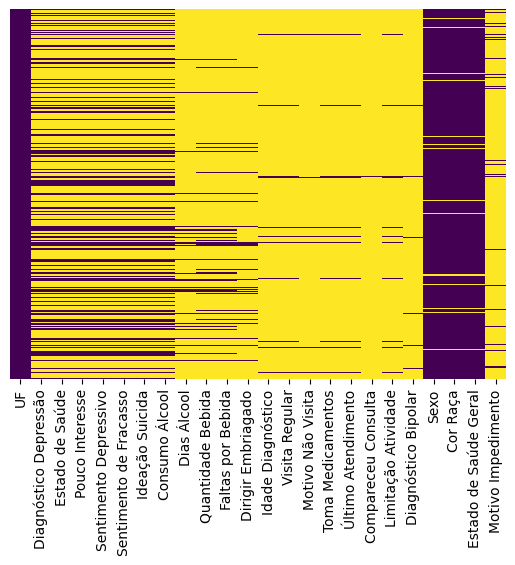

In [49]:
# Vendo o gráfico de quantidade de dados vazios
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
# converte colunas para número
df = df.apply(pd.to_numeric)

In [51]:
df.shape

(293726, 24)

In [52]:
# Pessoas que tiveram diagnóstico de depressão: 1.0, Pessoas que não tiveram: 2.0
counts = df['Diagnóstico Depressão'].value_counts()
counts

2.0    82514
1.0     8332
Name: Diagnóstico Depressão, dtype: int64

In [53]:
df.columns

Index(['UF', 'Diagnóstico Depressão', 'Estado de Saúde', 'Pouco Interesse',
       'Sentimento Depressivo', 'Sentimento de Fracasso', 'Ideação Suicida',
       'Consumo Álcool', 'Dias Álcool', 'Quantidade Bebida',
       'Faltas por Bebida', 'Dirigir Embriagado', 'Idade Diagnóstico',
       'Visita Regular', 'Motivo Não Visita', 'Toma Medicamentos',
       'Último Atendimento', 'Compareceu Consulta', 'Limitação Atividade',
       'Diagnóstico Bipolar', 'Sexo', 'Cor Raça', 'Estado de Saúde Geral',
       'Motivo Impedimento'],
      dtype='object')

In [54]:
# Filtros para buscar possível não diagnóstico de depressão

# df_depressao = df.loc[df['Diagnóstico Depressão'] == 1]

df_possivel_nao_depressao = df.loc[(df['Diagnóstico Depressão'].isnull()) | (df['Diagnóstico Depressão'] == 2.0 )]

df_possivel_nao_depressao = df_possivel_nao_depressao.loc[(df_possivel_nao_depressao['Pouco Interesse'] == 1.0) | (df_possivel_nao_depressao['Pouco Interesse'] == 2.0 )]
df_possivel_nao_depressao = df_possivel_nao_depressao.loc[(df_possivel_nao_depressao['Consumo Álcool'] == 1.0) | (df_possivel_nao_depressao['Consumo Álcool'] == 2.0 )]
df_possivel_nao_depressao = df_possivel_nao_depressao.loc[df_possivel_nao_depressao['Sentimento Depressivo'] == 1.0]
df_possivel_nao_depressao = df_possivel_nao_depressao.loc[df_possivel_nao_depressao['Sentimento de Fracasso'] == 1.0]
df_possivel_nao_depressao = df_possivel_nao_depressao.loc[df_possivel_nao_depressao['Estado de Saúde'] == 1.0]
df_possivel_nao_depressao = df_possivel_nao_depressao.loc[(df_possivel_nao_depressao['Estado de Saúde Geral'] == 1.0) | (df_possivel_nao_depressao['Estado de Saúde Geral'] == 2.0 )]
df_possivel_nao_depressao = df_possivel_nao_depressao.loc[df_possivel_nao_depressao['Motivo Impedimento'] != 12.0]

# Inputando dados para completar o dataframe
df_possivel_nao_depressao['Diagnóstico Depressão'] = 2.0

df_possivel_nao_depressao.shape

(6744, 24)

In [55]:
df_so_depressao = df.loc[df['Diagnóstico Depressão'] == 1.0]

<AxesSubplot: >

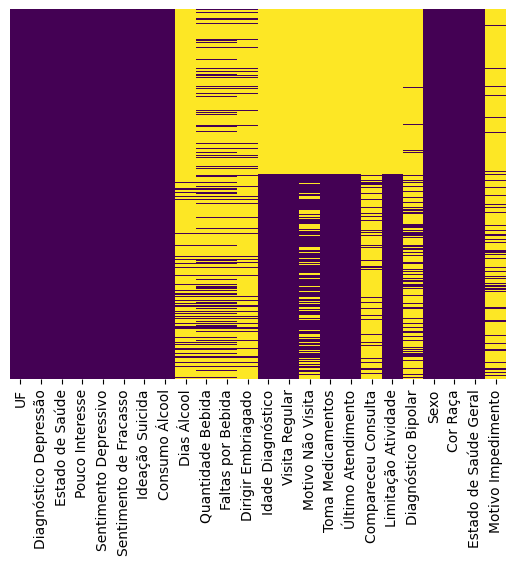

In [56]:
df_depressao = pd.concat([df_possivel_nao_depressao, df_so_depressao], axis=0)

sns.heatmap(df_depressao.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
# Salvando arquivo reduzido como csv
df_depressao.to_csv(os.getcwd() + '/base-reduzida-v3.csv', sep=',', encoding='utf-8')